# Train AI

In [ ]:
# Clone source code YOLOv7 vào thư mục Yolov7_Train
%cd /content/drive/MyDrive/Yolov7_Train
!git clone https://github.com/augmentedstartups/yolov7.git

In [ ]:
# Tải weight pretrain để nhận diện thử
%cd /content/drive/MyDrive/Yolov7_Train/yolov7
!mkdir pretrain
%cd pretrain
!wget https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7.pt

In [ ]:
# Tải ảnh sample từ internet
%cd /content/drive/MyDrive/Yolov7_Train/yolov7
!mkdir test_images
%cd test_images
!wget https://i0.wp.com/post.medicalnewstoday.com/wp-content/uploads/sites/3/2020/03/GettyImages-1092658864_hero-1024x575.jpg

In [ ]:
# Nhận diện thử với weight pretrain
%cd /content/drive/MyDrive/Yolov7_Train/yolov7
!python detect.py --weights pretrain/yolov7.pt --source /content/drive/MyDrive/Yolov7_Train/yolov7/test_images/GettyImages-1092658864_hero-1024x575.jpg

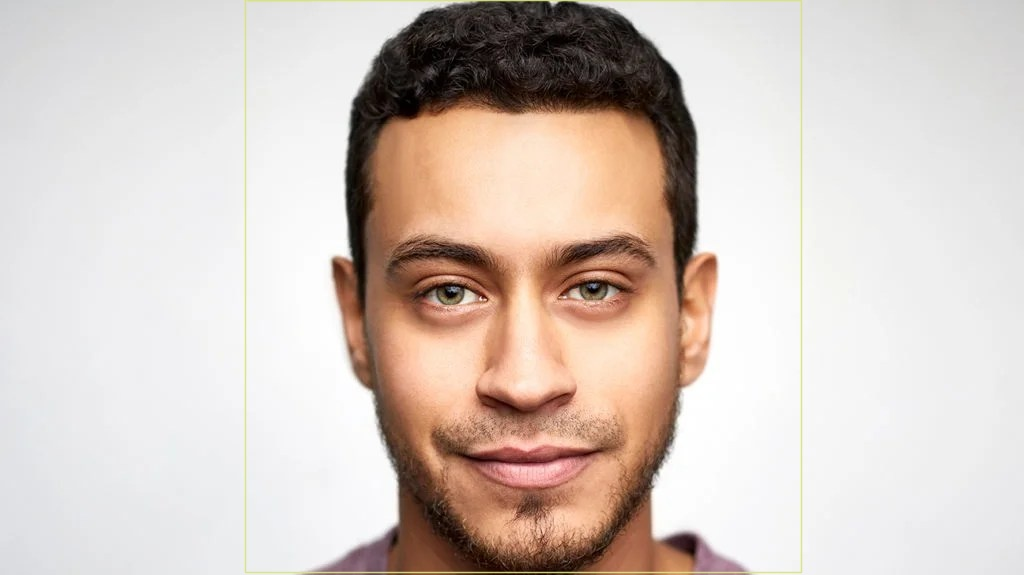

In [ ]:
from IPython.display import Image, display
display(Image(filename="/content/drive/MyDrive/Yolov7_Train/yolov7/runs/detect/exp2/GettyImages-1092658864_hero-1024x575.jpg"))

In [ ]:
# Giải nén dữ liệu để train model
%cd /content/drive/MyDrive/Yolov7_Train/
!mkdir train_data
%cd train_data
!unzip ../yolo_plate_dataset.zip

In [ ]:
# Tổ chức lại thư mục train
# train
#   - images
#   - labels
# test
#   - images
#   - labels

%cd /content/drive/MyDrive/Yolov7_Train/train_data
!mkdir train
!mkdir train/images
!mkdir train/labels

!mv yolo_plate_dataset/*.jpg train/images
!mv yolo_plate_dataset/*.txt train/labels

In [ ]:
# Khai báo 1 file yaml để YOLOv7 biết:
# - Đường dẫn đến thư mục train, test
# - Số lượng class qua biến nc
# - Tên của các class

%cd /content/drive/MyDrive/Yolov7_Train/yolov7/
!rm data/mydataset.yaml
!echo 'train: ../train_data/train' >> data/mydataset.yaml
!echo 'val: ../train_data/train' >> data/mydataset.yaml
!echo 'nc: 1' >> data/mydataset.yaml
!echo "names: ['license_plate']" >> data/mydataset.yaml

/content/drive/MyDrive/Yolov7_Train/yolov7


In [ ]:
# Train model YOLOv7 với dữ liệu
%cd /content/drive/MyDrive/Yolov7_Train/yolov7/
!python train.py --batch 8 --cfg cfg/training/yolov7.yaml --epochs 10 --data data/mydataset.yaml --weights 'pretrain/yolov7.pt'

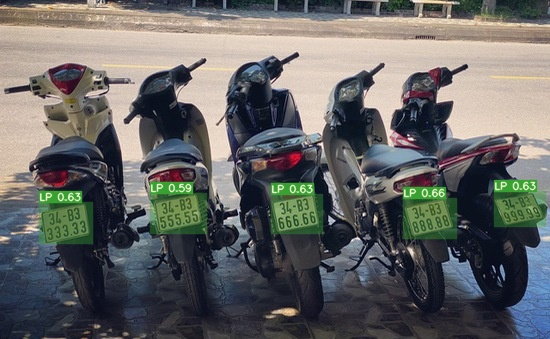

In [ ]:
from IPython.display import Image, display
display(Image(filename="/content/drive/MyDrive/Yolov7_Train/yolov7/runs/detect/exp/b5lzextxf7r3.jpg"))

# INSTALL

## Install Object Tracking

In [ ]:
%cd /content/drive/MyDrive/Yolov7_Train/yolov7
!git clone https://github.com/abewley/sort.git

In [ ]:
%cd /content/drive/MyDrive/Yolov7_Train/yolov7/sort
!pip install -r requirements.txt

## Install EASYOCR

In [ ]:
%cd /content/drive/MyDrive/Yolov7_Train/yolov7/
!pip install easyocr

## Install PADDLEOCR

In [ ]:
%cd /content/drive/MyDrive/Yolov7_Train/yolov7/
!python -m pip install paddlepaddle-gpu
!pip install "paddleocr>=2.0.1"

## FIX BUG

In [ ]:
%cd /content/drive/MyDrive/Yolov7_Train/yolov7
!wget http://nz2.archive.ubuntu.com/ubuntu/pool/main/o/openssl/libssl1.1_1.1.1f-1ubuntu2.19_amd64.deb
!sudo dpkg -i libssl1.1_1.1.1f-1ubuntu2.19_amd64.deb
!pip install numpy==1.23.1

# RUN

### Detect with Images, Videos

In [ ]:
# Nhận diện thử biển số xe với model
%cd /content/drive/MyDrive/Yolov7_Train/yolov7
!python detect.py --weights /content/drive/MyDrive/Yolov7_Train/train_models/LP_detect_yolov7_500img.pt --source 0 --no-trace

### Detect with Webcam

In [ ]:
%cd /content/drive/MyDrive/Yolov7_Train/yolov7
%run webcam_colab.py